In [51]:
import itertools
import json
import os
from random import sample

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from sklearn import metrics

from database import data_utils

import importlib
importlib.reload(data_utils)

RUN_FOLDER = "../results/3_mo_cross_val/"

In [52]:
kcm_deeptte_results = data_utils.extract_deeptte_results(RUN_FOLDER, "kcm/")
kcm_deeptte_results

,Model,City,Loss Set,Fold,Epoch,MAPE,RMSE,MAE
245,DeepTTE,Seattle,train_00,0,0,0.521814,694.389810,554.893325
248,DeepTTE,Seattle,train_00,0,1,0.268821,550.973755,387.808119
230,DeepTTE,Seattle,train_00,0,2,0.223879,483.254498,321.574711
229,DeepTTE,Seattle,train_00,0,3,0.328228,615.385456,459.411903
199,DeepTTE,Seattle,train_00,0,4,0.196673,478.108280,302.623073
...,...,...,...,...,...,...,...,...
219,DeepTTE,Seattle,train_04,4,46,0.110109,282.900384,174.886125
208,DeepTTE,Seattle,train_04,4,47,0.125523,290.378814,191.156366
38,DeepTTE,Seattle,train_04,4,48,0.107615,273.759741,166.710049
53,DeepTTE,Seattle,train_04,4,49,0.105526,280.379311,169.062012


In [29]:
kcm_model_results = data_utils.load_pkl(RUN_FOLDER + "kcm/" + "model_results.pkl")
atb_model_results = data_utils.load_pkl(RUN_FOLDER + "atb/" + "model_results.pkl")
kcm_result_df, kcm_loss_df = data_utils.extract_results("Seattle", kcm_model_results)
atb_result_df, atb_loss_df = data_utils.extract_results("Trondheim", atb_model_results)
model_performances_df = pd.concat([kcm_result_df, atb_result_df], axis=0)
model_curves_df = pd.concat([kcm_loss_df, atb_loss_df], axis=0)

FileNotFoundError: [Errno 2] No such file or directory: '../results/3_mo_cross_val/kcm/model_results.pkl'

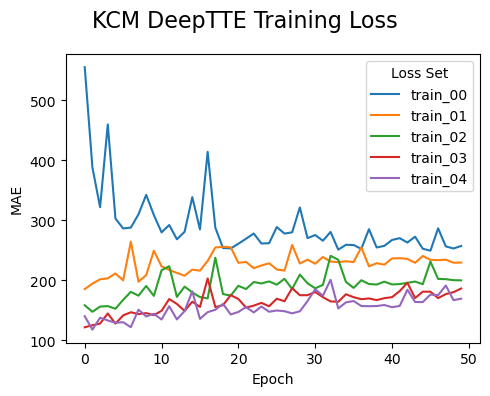

In [54]:
plot_data = kcm_deeptte_results[kcm_deeptte_results['Loss Set']!="test"]
fig, axes = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(5)
sns.lineplot(plot_data, x="Epoch", y="MAE", hue="Loss Set", ax=axes)
fig.suptitle('KCM DeepTTE Training Loss', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_curves_deeptte_seattle.png", dpi=1800, bbox_inches='tight')

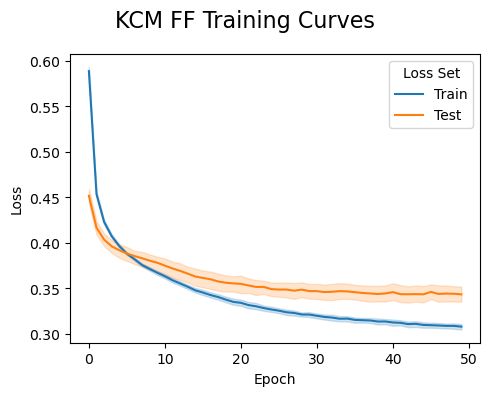

In [88]:
plot_data = model_curves_df[model_curves_df['City']=="Seattle"]
fig, axes = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(5)
sns.lineplot(plot_data, x="Epoch", y="Loss", hue="Loss Set", ax=axes)
fig.suptitle('KCM FF Training Loss', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_curves_seattle.png", dpi=1800, bbox_inches='tight')

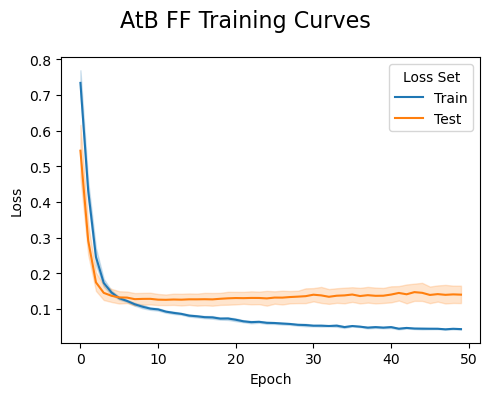

In [89]:
plot_data = model_curves_df[model_curves_df['City']=="Trondheim"]
fig, axes = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(5)
sns.lineplot(plot_data, x="Epoch", y="Loss", hue="Loss Set", ax=axes)
fig.suptitle('AtB FF Training Loss', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_curves_trondheim.png", dpi=1800, bbox_inches='tight')

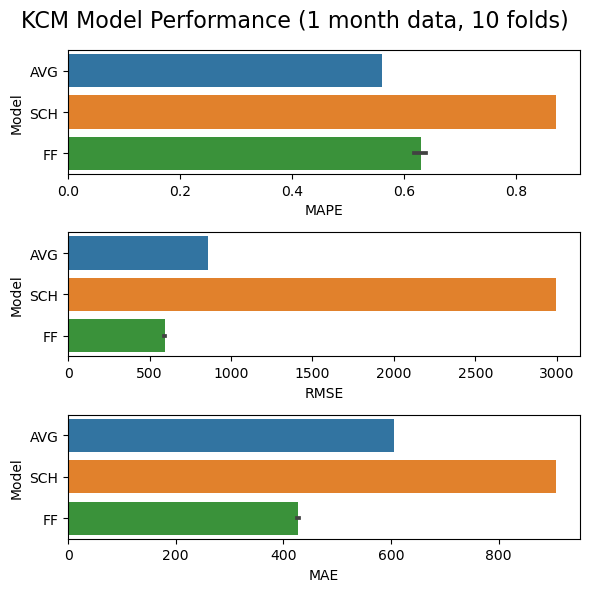

In [90]:
plot_data = model_performances_df[model_performances_df['City']=="Seattle"]
fig, axes = plt.subplots(3,1)
fig.set_figheight(6)
fig.set_figwidth(6)
sns.barplot(plot_data, x="MAPE", y="Model", ax=axes[0])
sns.barplot(plot_data, x="RMSE", y="Model", ax=axes[1])
sns.barplot(plot_data, x="MAE", y="Model", ax=axes[2])
fig.suptitle('KCM Model Performance (1 month data, 10 folds)', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_performances_seattle.png", dpi=1800, bbox_inches='tight')

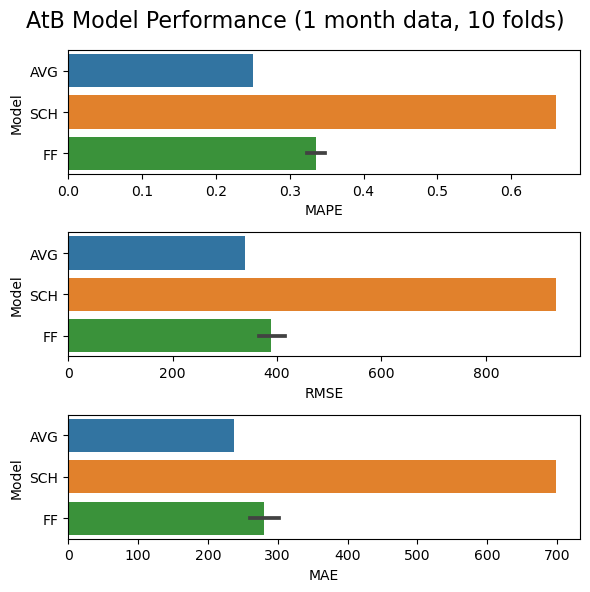

In [91]:
plot_data = model_performances_df[model_performances_df['City']=="Trondheim"]
fig, axes = plt.subplots(3,1)
fig.set_figheight(6)
fig.set_figwidth(6)
sns.barplot(plot_data, x="MAPE", y="Model", ax=axes[0])
sns.barplot(plot_data, x="RMSE", y="Model", ax=axes[1])
sns.barplot(plot_data, x="MAE", y="Model", ax=axes[2])
fig.suptitle('AtB Model Performance (1 month data, 10 folds)', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_performances_trondheim.png", dpi=1800, bbox_inches='tight')